In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

The following is just a review of the basics on matplotlib, check [this matplotlib tutorial](https://www.w3schools.com/python/matplotlib_intro.asp) for a more complete guide.

### Plot()

The simplest and fastest way to plot with matplotlib is by using ``plt.plot()``. It has the following options:

* ``color``: color...
* ``marker``: type of marker at each point
* ``linestyle (ls)``: line style
* ``ms``: marker size
* ``linewidth (lw)``: linewidth 
* ``mec``: color of marker's edge
* ``mfc``: color inside marker's edge
* ``label``: A label for the plot.

``color``, ``marker`` and ``linestyle`` (``ls``) can be passed separately or using the fmt = \[color\]\[marker\]\[ls\] format (e.g. ``'g^--'``). 

At the end of the plot we can use 

* ``plt.grid()``: Draw a grid and it has the options 
    * ``axes``: Takes the values 'x', 'y' or 'both' (default)
    * ``color``: color
    * ``ls``: line style
    * ``lw``: linewidth
    
* ``plt.lengend()``: Makes all labels appear in the plot

* ``plt.title()``: Set plot's title
    * ``loc``: position of the title, ('right', 'left' or 'center' (default))
    
* ``plt.xlabel()``: x label
    * ``rotation``: orientation of the label ('vertical' or 'horizontal')
    
* ``plt.ylabel()``: y label

These last three functions can take the option ``fontdict`` which is a dictionary containing the font, color and size of the title or labels. Also, we can use $$ to write LaTeX format.

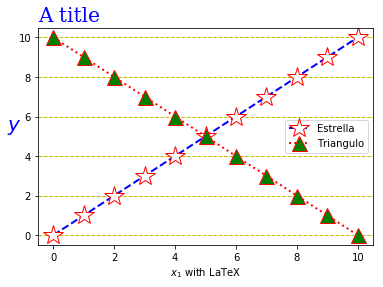

In [3]:
x = np.linspace(0,10,11)
y = np.linspace(0,10,11)

plt.plot(x, y, color = 'b', marker = '*', ls = '--',  ms = 20, lw = 2, mec = 'r', mfc = 'w', label = 'Estrella')
plt.plot(x, -y + 10, 'r^:',  ms = 15, lw = 2, mfc = 'g', label = 'Triangulo')

plt.grid(axis = 'y', color = 'y', ls = '--', lw = 1)

font1 = {'family':'serif','color':'blue','size':20}

plt.title("A title", fontdict = font1, loc = 'left')
plt.xlabel("$x_1$ with LaTeX")
plt.ylabel("$y$", fontdict = font1, rotation = 'horizontal')
plt.legend()
plt.show()

Many plots can be drawn in the same figure by writing one plt.plot() line after the other (like we did before) or even in the same line by paiting xs and ys (like we do in what follows).

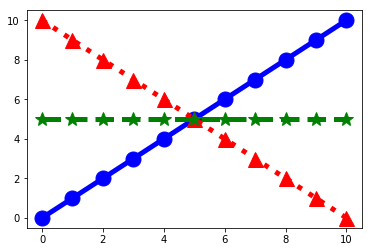

In [4]:
plt.plot(x, y, 'bo-', x, -y + 10, 'r^:', x, np.zeros_like(x)+5, 'g*--', ms = 15, lw = 5)
plt.show()

### Scatter()

Another well used function of matplotlib is scatter. It includes the options:

* ``c = colors``: Specify a different color for each point using the array of colors, ``colors`` with the same length of axis (e.g. ``colors = ['red','green,'blue']`` for a plot with 3 points). We can even use the y axis as the color list, so the gradient decrese or increse together with the y-value!

* ``cmap``: Instead of writing a different color for each point manually, we can use colormaps. They are just list of colors, where each color has a value that ranges from 0 to 100.

* ``s = sizes``: List of sizes for each point.

* ``alpha``: transparency of the dots

Finally, a colorbar can added to the plot with ``plt.colorbar()`` which has the ``label`` option.

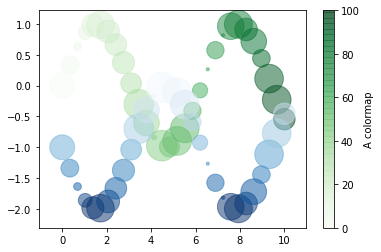

In [5]:
x = np.linspace(0,10, 30)
y = np.array([np.sin(i) for i in x])

colors = np.linspace(0,100,len(x))
sizes = 10 * np.random.randint(100, size=(len(x)))

plt.scatter(x, y, c = colors, cmap = 'Greens', s = sizes, alpha = 0.5)
plt.colorbar(label = 'A colormap')

plt.scatter(x, -y - 1, c = y, cmap = 'Blues', s = sizes, alpha = 0.5)

plt.show()

### Contourplots

Much of the content of this section is taken from [this tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html).

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. To do so Matplotlib provides us with ``plt.contour()`` for contour plots, ``plt.contourf`` for filled contour plots and ``plt.imshow()`` to show the images.

The ``plt.contour`` function takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. 

In order to prepare such data, we use the ``np.meshgrid`` function from numpy. It builds two-dimensional grids from one-dimensional arrays. Basically, taking the x values and the y values, it creates a matrix with all different combinations of $(x_i, y_i)$. This can be seen in a scatter plot.

(3, 4) (3, 4) 

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 

 [[-1 -1 -1 -1]
 [-2 -2 -2 -2]
 [-3 -3 -3 -3]]


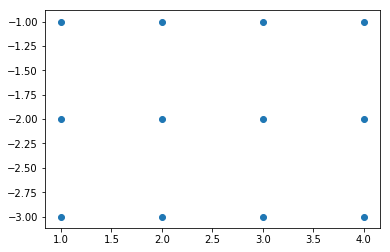

In [21]:
# Example
x = np.array([1,2, 3, 4])
y = np.array([-1,-2, -3])

xx, yy = np.meshgrid(x,y)

print(np.shape(xx),np.shape(yy), '\n')
print(xx, '\n\n', yy)

plt.scatter(xx, yy)
plt.show()

The function $z(x, y)$, when used on the grid, i.e. $z(xx, yy)$, it will assign a different value to each of those points

``plt.contour(x,y,z,levels)`` admits the options 
* ``colors``: line-only with single color
* ``cmap``: color map
* ``levels``: number of lines to be drawn. If an array is given, each element is the position of a different line

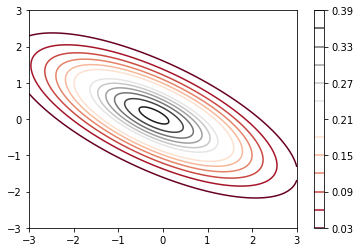

In [58]:
x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
xx, yy = np.meshgrid(x,y)
z = lambda x,y: 1/(np.sqrt(2*np.pi)) * np.exp(-0.5*((x + .1)**2 + 2*y**2 + 2*x*y))

plt.contour(xx,yy,z(xx,yy), 15, cmap = 'RdGy')

plt.colorbar()
plt.show()

Similarly, we can use ``plt.contourf`` for color-filled plots

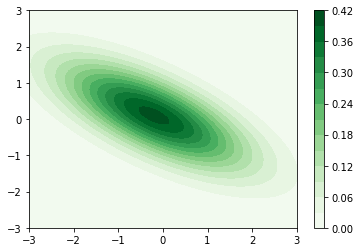

In [60]:
plt.contourf(xx,yy,z(xx,yy), 15, cmap = 'Greens')

plt.colorbar()
plt.show()

One problem with the previous plot is that the different levels are shown in a discrete fashion. In order to get a continous plot there are two options: 1) to set the level number really high 2) to use imshow. The first option is very inefficient so the second option is better.

``plt.imshow`` interprets a two-dimensional grid of data as an image. The only drawback is that we have to manually specify the extent \[xmin, xmax, ymin, ymax\] of the image on the plot.

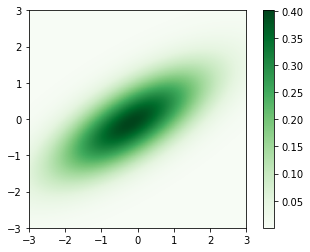

In [64]:
plt.imshow(z(xx,yy), extent = [-3,3,-3,3], cmap = 'Greens')

plt.colorbar()
plt.show()

### bar()

Another useful function is ``plt.bar()``. It takes the arguments ``color``, and ``width``.

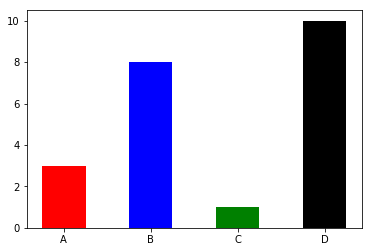

In [86]:
x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])
colors = ['red','blue','green','black']

plt.bar(x, y, color = colors, width = 0.5)
plt.show()

### hist()

To learn about the meaning of histograms in terms of probability and how to turn them into density plots, check [this amazing blog](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0).

The function ``plt.hist()`` is used to create histograms.

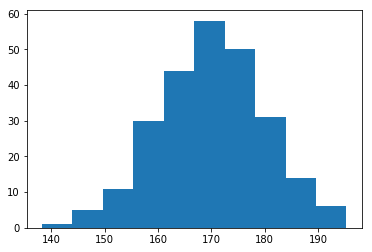

In [89]:
x = np.random.normal(170, 10, 250) # 250 samples from a normal distribution with mu = 170, sigma = 10.

plt.hist(x)
plt.show() 

### Figure and Subplots

Instead of plotting directly, we can previously create a figure so to modify its size with ``figsize``.

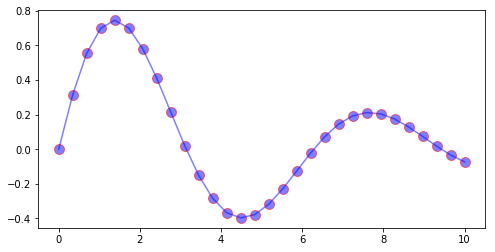

In [126]:
x = np.linspace(0,10, 30)
y = np.array([np.sin(i)*np.exp(-i/5) for i in x])

plt.figure(figsize=(8,4))
plt.plot(x, y, 'bo-', mec = 'red', ms = 10, alpha = 0.5)

plt.show()

To create subplots we use ``plt.subplots(nrow, ncol)``. It outputs a figure object and the axes list where each element can be used to plot a totally independent plot. Sometimes is also useful to unpack the axes list

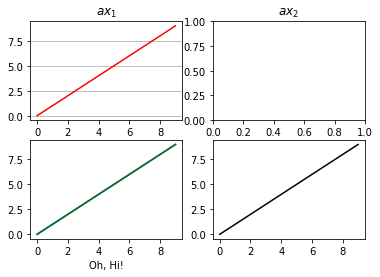

In [128]:
fig, ax = plt.subplots(2, 2)


((ax1, ax2), (ax3, ax4)) = ax # unpacking

# By indexing ax
ax[0, 0].plot(range(10), 'r') #row=0, col=0
ax[1, 0].plot(range(10), 'b') #row=1, col=0

# By using the unpacked values
ax3.plot(range(10), 'g') #row=0, col=1
ax4.plot(range(10), 'k') #row=1, col=1

ax1.grid(axis = 'y')
ax1.set_title("$ax_1$")

ax3.set_xlabel("Oh, Hi!")
ax2.set_title("$ax_2$")

plt.show()